In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datasetsV2 import build_dataset
# from datasetsV2 import build_dataset
import torch
from tqdm.notebook import tqdm


In [11]:
def show_sample(data_loader, show_label):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
   
    for img, label in zip(images, labels):
        print(label.item())
        # if label.item() == show_label:
        img = img.numpy()

        print(img.shape)
        
        if img.shape[0] != 3:
            raise ValueError(f"Expected the first dimension of the image to be 3 (channels), but received {img.shape[0]}.")

        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = img * std[:, None, None] + mean[:, None, None]
        img = np.clip(img, 0, 1)
        
        img = img.transpose((1, 2, 0))
        label_text = "REAL" if label.item() == 0 else "FAKE"
        plt.imshow(img)
        plt.title(f'Label: {label_text}')
        plt.show()
        break

In [12]:
class Opt:
    def __init__(self) -> None:
        self.is_experiment = True
        self.output_dir = '.'
        self.nb_classes = 1
        pass

args = Opt()

In [13]:
print("Building train dataset")
train_dataset = build_dataset(is_train=True, args=args)
# train_dataset = shuffle_dataset(train_dataset)
validation_dataset = build_dataset(is_train=False, args=args)

Building train dataset


/home/eferreira/.local/lib/python3.8/site-packages/pydantic/main.py:176: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  self.__pydantic_validator__.validate_python(data, self_instance=self)


Loading a small part of the dataset for fast experiments
Balancing classes..
Quantidade de rótulos antes do balanceamento:
label
1    2708950
0     521331
Name: count, dtype: int64
Quantidade de rótulos após o balanceamento:
label
0    521331
1    521331
Name: count, dtype: int64
Saving used samples..


Loading train dataset: 100%|██████████| 1042662/1042662 [00:00<00:00, 1290961.00it/s]


Carregando VAL DATASET
Loading a small part of the dataset for fast experiments
Balancing classes..
Quantidade de rótulos antes do balanceamento:
label
0    62471
1    61549
Name: count, dtype: int64
Quantidade de rótulos após o balanceamento:
label
0    61549
1    61549
Name: count, dtype: int64
Saving used samples..


Loading val dataset: 100%|██████████| 123098/123098 [00:00<00:00, 1237329.63it/s]


In [14]:
# def collate_fn(batch):
#     images, labels = zip(*batch)
#     images = [img for sublist in images for img in sublist]
#     labels = [label for sublist in labels for label in sublist]
#     images = torch.stack(images)
#     labels = torch.tensor(labels)
#     return images, labels

In [15]:
dataset_train, args.nb_classes = build_dataset(is_train=True, args=args)

data_loader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=1,
    num_workers=1,
    drop_last=True,
    shuffle=True
    )

dataset_val, _ = build_dataset(is_train=False, args=args)
data_loader_val = torch.utils.data.DataLoader(
    dataset_val, batch_size=1,
    shuffle=True, num_workers=1,
    drop_last=False
)

/home/eferreira/.local/lib/python3.8/site-packages/pydantic/main.py:176: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  self.__pydantic_validator__.validate_python(data, self_instance=self)


Loading a small part of the dataset for fast experiments
Balancing classes..
Quantidade de rótulos antes do balanceamento:
label
1    2708950
0     521331
Name: count, dtype: int64
Quantidade de rótulos após o balanceamento:
label
0    521331
1    521331
Name: count, dtype: int64
Saving used samples..


Loading train dataset: 100%|██████████| 1042662/1042662 [00:00<00:00, 1250000.76it/s]


Carregando VAL DATASET
Loading a small part of the dataset for fast experiments
Balancing classes..
Quantidade de rótulos antes do balanceamento:
label
0    62471
1    61549
Name: count, dtype: int64
Quantidade de rótulos após o balanceamento:
label
0    61549
1    61549
Name: count, dtype: int64
Saving used samples..


Loading val dataset: 100%|██████████| 123098/123098 [00:00<00:00, 1174001.13it/s]


In [16]:
x = 0
n_images = 32
for img in data_loader_train:
    if x == n_images:
        break
    
    else:
        print(img[1])
        x += 1

tensor([1])
tensor([1])
tensor([1])
tensor([1])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([1])
tensor([0])
tensor([1])
tensor([1])
tensor([0])
tensor([1])
tensor([0])
tensor([1])
tensor([1])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([1])
tensor([1])
tensor([1])
tensor([0])
tensor([0])
tensor([1])
tensor([0])
tensor([1])
tensor([1])
tensor([0])


0
(3, 224, 224)


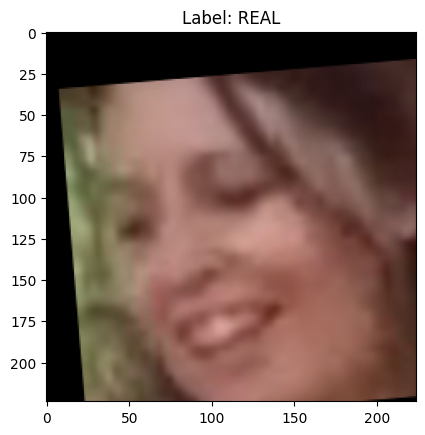

In [7]:
show_sample(data_loader_train, show_label=1)

0
(3, 224, 224)


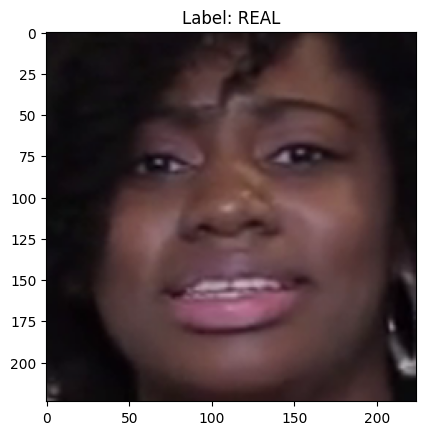

In [8]:
show_sample(data_loader_val, show_label=1)